  project_timeline.png: 305x186 px


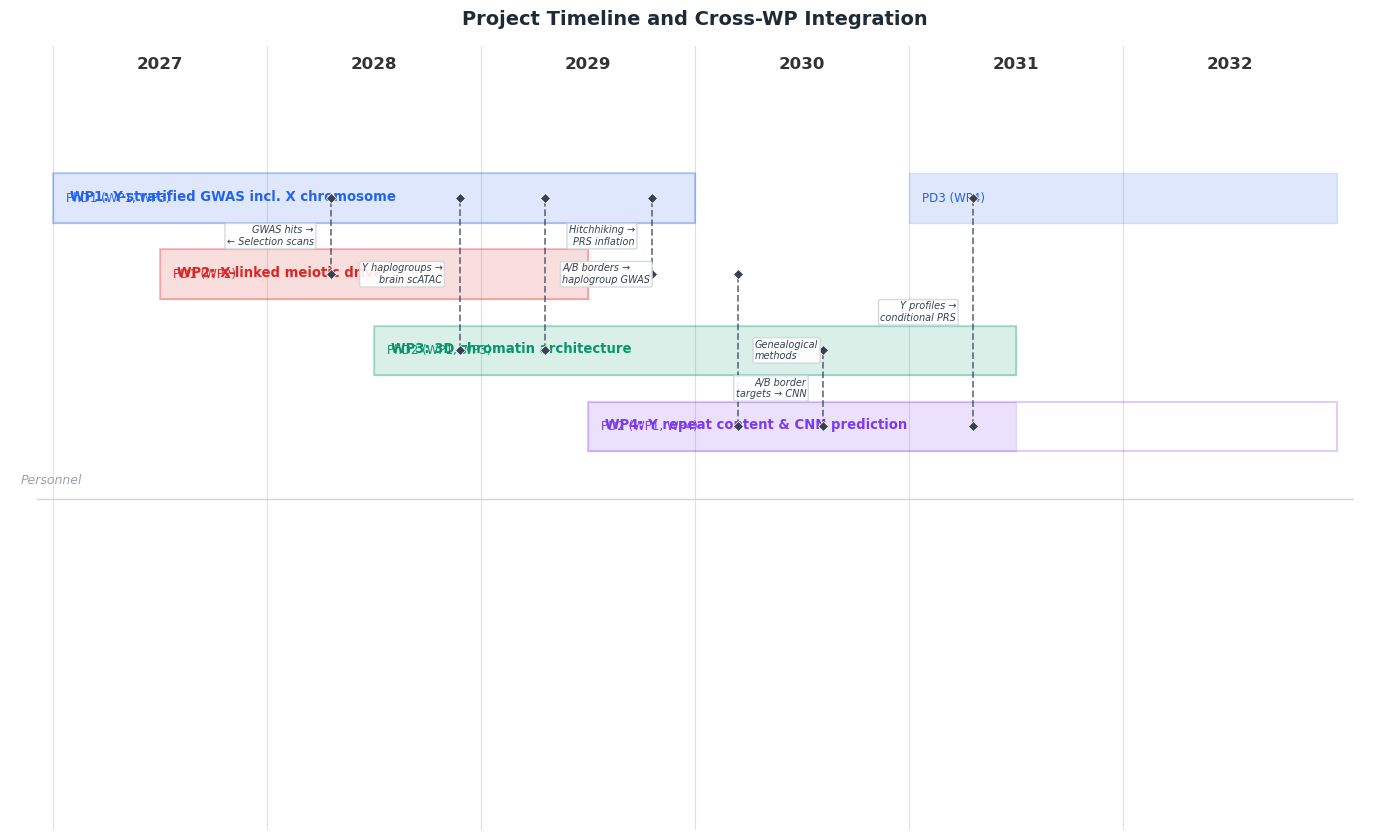

In [ ]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch
import numpy as np
import yaml
import os
from pathlib import Path

# ── Load data from YAML ───────────────────────────────────
yaml_path = Path(os.getcwd()).parent / 'gantt.yaml'
with open(yaml_path) as f:
    data = yaml.safe_load(f)

wp_data    = data['work_packages']
pers_data  = data['personnel']
exchanges  = data['exchanges']

fig, ax = plt.subplots(figsize=(14, 8.5))

# ── Year grid ─────────────────────────────────────────────
years = [2027, 2028, 2029, 2030, 2031, 2032]
x_start = 2026.8
x_end   = 2033.2

for y in years:
    ax.axvline(y, color='#E0E0E0', linewidth=0.8, zorder=0)
    ax.text(y + 0.5, 11.65, str(y), ha='center', va='bottom',
            fontsize=12, fontweight='bold', color='#333333')

# ── WP bars ───────────────────────────────────────────────
bar_height = 0.65
wp_names = list(wp_data.keys())
wp_rows  = {name: 10 - i for i, name in enumerate(wp_names)}

for wp, info in wp_data.items():
    row   = wp_rows[wp]
    start = info['start']
    end   = info['end']
    color = info['color']
    ax.barh(row, end - start, left=start, height=bar_height,
            color='none', alpha=0.25, edgecolor=color, linewidth=1.5, zorder=2)
    ax.text(start + 0.08, row + 0.02, info['label'],
            va='center', ha='left', fontsize=9.5, fontweight='600',
            color=color, zorder=3)

# ── Personnel bars ────────────────────────────────────────
pers_color = '#6B7280'
pers_y_top = wp_rows[wp_names[-1]] - 1.5   # below lowest WP
pers_spacing = 0.8

for i, p in enumerate(pers_data):
    # row   = pers_y_top - i * pers_spacing
    row = wp_rows[p['lead']]
    start = p['start']
    end   = p['end']
    color = wp_data[p['lead']]['color']

    ax.barh(row, end - start, left=start, height=bar_height,
            color=color, alpha=0.15, edgecolor=color,
            linewidth=1, zorder=2)
    ax.text(start + 0.06, row, p['label'],
            va='center', ha='left', fontsize=8.5, color=color, zorder=3)

# ── Separator line ────────────────────────────────────────
sep_y = pers_y_top + 0.55
ax.axhline(sep_y, color='#D1D5DB', linewidth=1, linestyle='-',
            xmin=0.02, xmax=0.98)
ax.text(x_start + 0.05, sep_y + 0.2, 'Personnel',
        fontsize=9, fontstyle='italic', color='#9CA3AF')

# ── Cross-WP exchange arrows ─────────────────────────────
for ex in exchanges:
    x      = ex['x']
    y_from = wp_rows[ex['from']] 
    y_to   = wp_rows[ex['to']]
    label  = ex['label']
    side   = ex.get('side', 'left')

    y_top = max(y_from, y_to)# - bar_height / 2
    y_bot = min(y_from, y_to)# + bar_height / 2

    # Vertical dashed connector
    ax.plot([x, x], [y_bot, y_top], color='#374151', linewidth=1.3,
            linestyle='--', alpha=0.7, zorder=4)

    # Diamond endpoints
    for yy in [y_bot, y_top]:
        ax.plot(x, yy, marker='D', markersize=5, color='#374151',
                markeredgecolor='white', markeredgewidth=0.5, zorder=5)

    # Label
    mid_y = (y_bot + y_top) / 2
    ha = 'right' if side == 'left' else 'left'
    x_off = -0.08 if side == 'left' else 0.08
    ax.text(x + x_off, mid_y, label, ha=ha, va='center',
            fontsize=7, color='#374151', fontstyle='italic',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white',
                        edgecolor='#D1D5DB', alpha=0.9), zorder=6)

# ── Formatting ────────────────────────────────────────────
bottom_y = pers_y_top - (len(pers_data) - 1) * pers_spacing - 0.6
ax.set_xlim(x_start, x_end)
ax.set_ylim(bottom_y, 12)
ax.set_yticks([])
ax.set_xticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Project Timeline and Cross-WP Integration',
                fontsize=14, fontweight='bold', color='#1F2937', pad=15)

plt.tight_layout()

# ── Save ──────────────────────────────────────────────────
out_dir = Path(os.getcwd())
dpi = 22   # 14*75 = 1650 px width (NORMA limit)
plt.savefig(out_dir / 'project_timeline.png',
            dpi=dpi, bbox_inches='tight', facecolor='white')
# plt.savefig(out_dir / 'project_timeline_hires.png',
#         dpi=150, bbox_inches='tight', facecolor='white')

from PIL import Image
for name in ['figure4.png'
            #  , 'project_timeline_hires.png'
                ]:
    img = Image.open(out_dir / name)
    assert img.size[0] <= 1650 and img.size[1] <= 1050, f"{name} dimensions {img.size[0]}x{img.size[1]} exceed NORMA limits"
    print(f"  {name}: {img.size[0]}x{img.size[1]} px")
